<h1 id="h1" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Red Wine Quality Classification </h1>

The dataset is related to red variants of the Portuguese "Vinho Verde" wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 


<center>
    
<img src="https://www.ledgerinsights.com/wp-content/uploads/2020/12/wine-810x524.jpg">
</center>

<h3>Challenges</h3>

* Imbalanced classes
* The complexity arises due to the fact that the dataset has fewer samples

<h3> Goal </h3>

* Creating a classification model to predict wine quality 

<h3> Columns (Wine characteristics) </h3>

* Input variables (based on physicochemical tests):
    * 1 - fixed acidity
    * 2 - volatile acidity
    * 3 - citric acid
    * 4 - residual sugar
    * 5 - chlorides
    * 6 - free sulfur dioxide
    * 7 - total sulfur dioxide
    * 8 - density
    * 9 - pH
    * 10 - sulphates
    * 11 - alcohol
* Output variable (based on sensory data):
    * 12 - quality (score between 0 and 10)

<h1 id="h2" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Import libraries </h1>

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

sns.set()

<h1 id="h3" style="color:white;background:#78004e;padding:8px;border-radius:8px">Loading dataset</h1>

In [3]:
df=pd.read_csv('WineQT.csv')

<h1 id="h4" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Exploring dataset</h1>

### Describe

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,8.285879,0.528132,0.260298,2.392651,0.081318,14.914505,43.267051,0.996693,3.316513,0.640768,10.435142,5.674352
std,1.649721,0.170495,0.191656,0.870089,0.020785,9.232228,29.039955,0.001735,0.143251,0.127751,1.028969,0.784835
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991570,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996600,3.320000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.410000,2.600000,0.088000,20.000000,58.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,6.550000,0.226000,46.000000,144.000000,1.002200,3.780000,1.130000,13.600000,8.000000


## Missing values

In [5]:
#Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.shape

(1143, 13)

## Cardinality

In [7]:
df.nunique().sort_values()

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

### Drop id

In [8]:
#Drop id 
df.drop('Id',axis=1,inplace=True)

## Information about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
fixed acidity           1143 non-null float64
volatile acidity        1143 non-null float64
citric acid             1143 non-null float64
residual sugar          1143 non-null float64
chlorides               1143 non-null float64
free sulfur dioxide     1143 non-null float64
total sulfur dioxide    1143 non-null float64
density                 1143 non-null float64
pH                      1143 non-null float64
sulphates               1143 non-null float64
alcohol                 1143 non-null float64
quality                 1143 non-null int64
dtypes: float64(11), int64(1)
memory usage: 107.2 KB


<h1 id="h5" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Handling Outliers </h1>

### Remove rows which contain cells with Z-score greater than 3

In [10]:
#Calculate z-score
z = np.abs(stats.zscore(df))

threshold = 3

#Keep rows with Z-score less than 3
df = df[(z < 3).all(axis=1)]

<h1 id="h6" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Boxplot features against wine quality</h1>
Let's visualize relation between wine features and wine quality

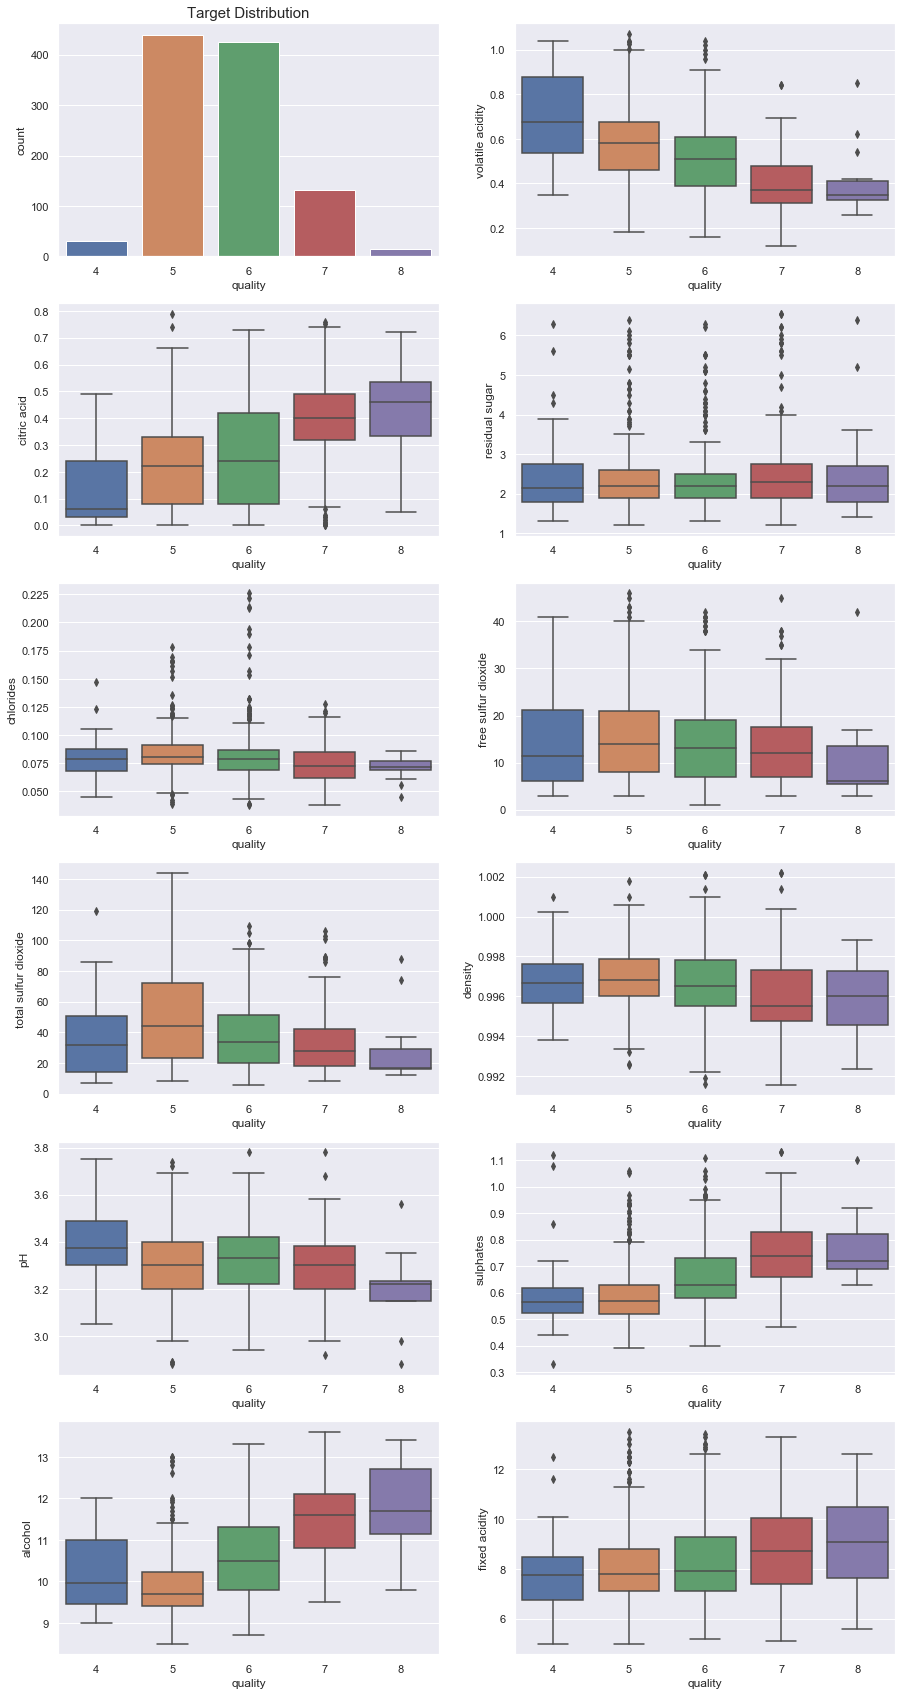

In [11]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.countplot(x=df.quality,ax=ax[0][0]).set_title('Target Distribution',size=15)
sns.boxplot(x=df.quality,y=df['volatile acidity'],ax=ax[0][1])
sns.boxplot(x=df.quality,y=df['citric acid'],ax=ax[1][0])
sns.boxplot(x=df.quality,y=df['residual sugar'],ax=ax[1][1])
sns.boxplot(x=df.quality,y=df['chlorides'],ax=ax[2][0])
sns.boxplot(x=df.quality,y=df['free sulfur dioxide'],ax=ax[2][1])
sns.boxplot(x=df.quality,y=df['total sulfur dioxide'],ax=ax[3][0])
sns.boxplot(x=df.quality,y=df['density'],ax=ax[3][1])
sns.boxplot(x=df.quality,y=df['pH'],ax=ax[4][0])
sns.boxplot(x=df.quality,y=df['sulphates'],ax=ax[4][1])
sns.boxplot(x=df.quality,y=df['alcohol'],ax=ax[5][0])
sns.boxplot(x=df.quality,y=df['fixed acidity'],ax=ax[5][1])

<h1 id="h7" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Correlation </h1>

Text(0.5,1,'Correlation')

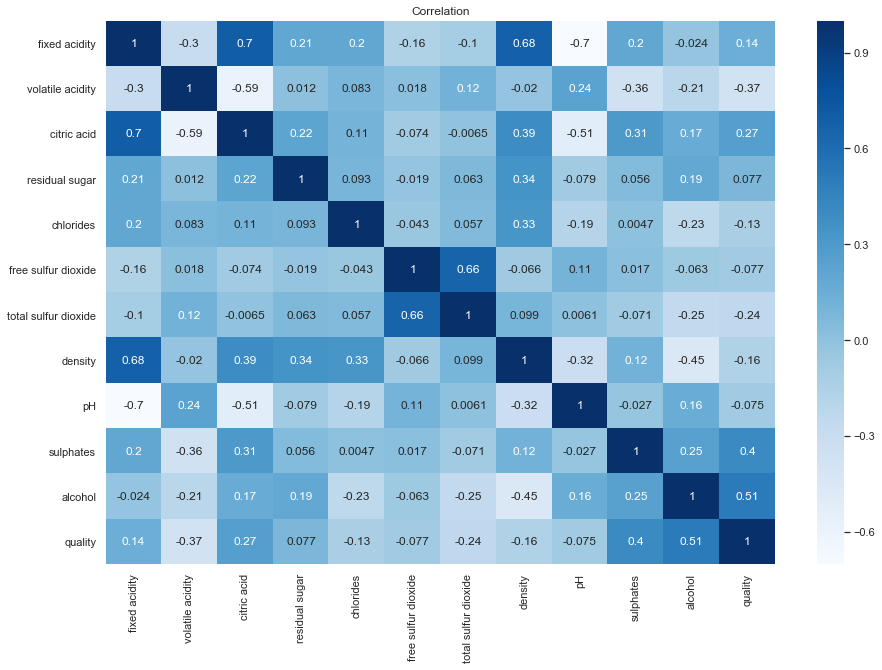

In [12]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.title("Correlation")

<h1 id="h8" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Pairplot important wine characteristics </h1>

In [15]:
sns.pairplot(df,corner=True, hue='quality',
            x_vars=['density','alcohol','pH','volatile acidity','citric acid','sulphates','fixed acidity'],
            y_vars=['density','alcohol','pH','volatile acidity','citric acid','sulphates','fixed acidity']
            )

TypeError: pairplot() got an unexpected keyword argument 'corner'

<h1 id="h9" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Distribution </h1>

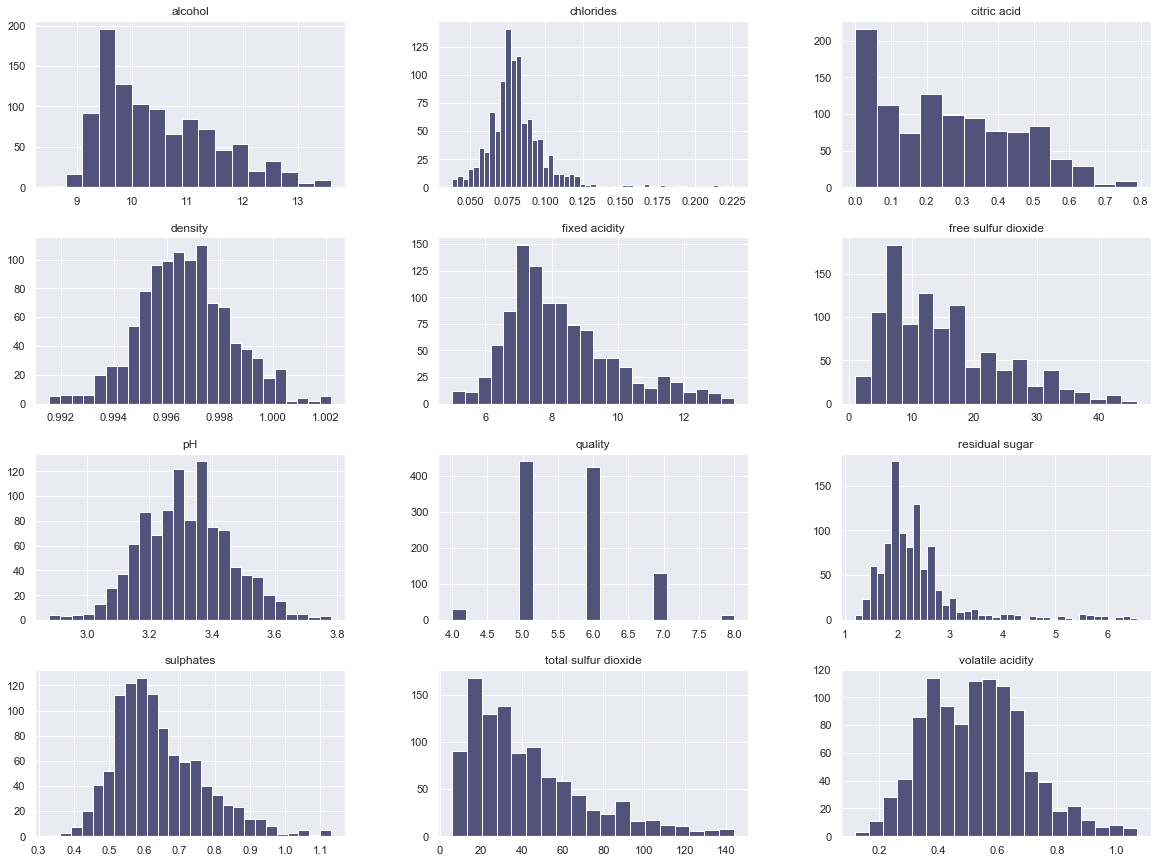

In [16]:
df.hist(figsize=(20,15),bins='auto', color='#52527a')
plt.show()

<h1 id="h10" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Skewness </h1>
The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

Text(0.5,0,'Skewness')

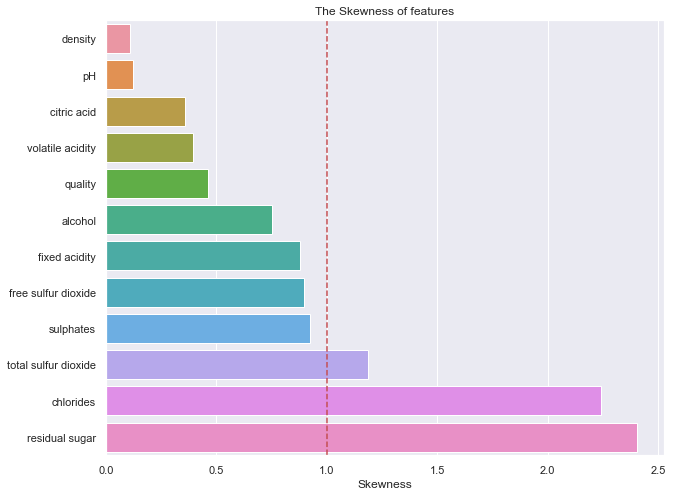

In [17]:
plt.figure(figsize=(10,8))
skewness=df.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Skewness')

### Highly skewed features:
* total sulfur dioxide
* residual sugar
* chlorides

### Log transformation

In [18]:
df['total sulfur dioxide']=df['total sulfur dioxide'].apply(np.log)
df['chlorides']=df['chlorides'].apply(np.log)
df['residual sugar']=df['residual sugar'].apply(np.log)

<h1 id="h11" style="color:white;background:#78004e;padding:8px;border-radius:8px"> SMOTE Oversampling</h1>

As you have noticed we are dealing with an impalanced dataset, to handle this I'll use SMOTE Oversampling.

Oversampling refers to copying or synthesizing new examples of the minority classes so that the number of examples in the minority class better resembles or matches the number of examples in the majority classes.

In [19]:
#Import library
from imblearn.over_sampling import SMOTE

#Define inputs and output
X=df.drop(['quality'],axis=1)
y=df['quality']

#Do oversampling
strategy={4:350,7:350,8:350}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

### Target distribution after oversampling

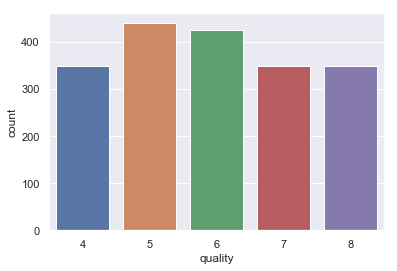

In [20]:
sns.countplot(x=y)

<h1 id="h12" style="color:white;background:#78004e;padding:8px;border-radius:8px"> Modeling </h1>

In [21]:
#Normalization
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=30)

## Cross validation function

In [22]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

## Random Forest Classifier

In [25]:
#Define model
RandomForest = RandomForestClassifier(n_estimators=200,max_depth=15)

### Get cross validation score

In [26]:
#Get cross validation score
scores=evaluate_model(RandomForest,X,y)
print('Random Forest Classifier Accuracy : ', np.mean(scores))

Random Forest Classifier Accuracy :  0.7979111526512406


### Confusion matrix

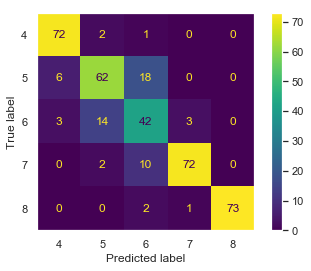

In [27]:
#Fit and predict output for X_valid
RandomForest.fit(X_train,y_train)
y_pred = RandomForest.predict(X_valid)

#Visualize Confusion matrix
CM=confusion_matrix(y_pred,y_valid,labels=RandomForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=RandomForest.classes_)
disp.plot(cmap='viridis')
plt.grid(None)

### Classification report

In [28]:
print(classification_report(y_pred,y_valid))

              precision    recall  f1-score   support

           4       0.89      0.96      0.92        75
           5       0.78      0.72      0.75        86
           6       0.58      0.68      0.62        62
           7       0.95      0.86      0.90        84
           8       1.00      0.96      0.98        76

    accuracy                           0.84       383
   macro avg       0.84      0.84      0.83       383
weighted avg       0.85      0.84      0.84       383



### Credits:
*  [SMOTE for Imbalanced Classification with Python by Jason Brownlee](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)